Data Preprocessing: 
Perform comprehensive data preprocessing, including handling missing values, scaling, and feature selection, while visualizing key trends and correlations to enhance data insights and model performance.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [99]:
# Load Data
data = pd.read_csv("Data-Melbourne_F.csv")
print("Data Preview:")
print(data.head())

Data Preview:
   avg_outflow  avg_inflow  total_grid    Am    BOD     COD      TN     T  \
0        2.941       2.589      175856  27.0  365.0   730.0  60.378  19.3   
1        2.936       2.961      181624  25.0  370.0   740.0  60.026  17.1   
2        2.928       3.225      202016  42.0  418.0   836.0  64.522  16.8   
3        2.928       3.354      207547  36.0  430.0   850.0  63.000  14.6   
4        2.917       3.794      202824  46.0  508.0  1016.0  65.590  13.4   

     TM    Tm  SLP   H    PP    VV     V    VM    VG  year  month  day  
0  25.1  12.6  0.0  56  1.52  10.0  26.9  53.5  79.5  2014      1    1  
1  23.6  12.3  0.0  63  0.00  10.0  14.4  27.8   0.0  2014      1    2  
2  27.2   8.8  0.0  47  0.25  10.0  31.9  61.1  77.8  2014      1    5  
3  19.9  11.1  0.0  49  0.00  10.0  27.0  38.9  53.5  2014      1    6  
4  19.1   8.0  0.0  65  0.00  10.0  20.6  35.2  53.5  2014      1    7  


In [100]:
# Basic EDA
print("\nData Info:")
data.info()

print("\nMissing Values per Column:")
print(data.isnull().sum())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   avg_outflow  1382 non-null   float64
 1   avg_inflow   1382 non-null   float64
 2   total_grid   1382 non-null   int64  
 3   Am           1382 non-null   float64
 4   BOD          1382 non-null   float64
 5   COD          1382 non-null   float64
 6   TN           1382 non-null   float64
 7   T            1382 non-null   float64
 8   TM           1382 non-null   float64
 9   Tm           1382 non-null   float64
 10  SLP          1382 non-null   float64
 11  H            1382 non-null   int64  
 12  PP           1382 non-null   float64
 13  VV           1382 non-null   float64
 14  V            1382 non-null   float64
 15  VM           1382 non-null   float64
 16  VG           1382 non-null   float64
 17  year         1382 non-null   int64  
 18  month        1382 non-null   int64  

In [101]:
# Data Scaling
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [102]:
# Feature Selection
variance_threshold = VarianceThreshold(threshold=0.1)
low_variance_data = variance_threshold.fit_transform(data[numerical_cols])
selected_features_variance = numerical_cols[variance_threshold.get_support()]

In [103]:
# Remove highly correlated features
correlation_matrix = pd.DataFrame(low_variance_data, columns=selected_features_variance).corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.85)]
final_selected_features = [col for col in selected_features_variance if col not in high_correlation_features]

print("\nSelected Features after Feature Selection:")
print(final_selected_features)


Selected Features after Feature Selection:
['avg_outflow', 'avg_inflow', 'total_grid', 'Am', 'BOD', 'COD', 'TN', 'T', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'VG', 'year', 'month', 'day']


In [104]:
# Data Visualization
sns.set_theme(style="whitegrid")

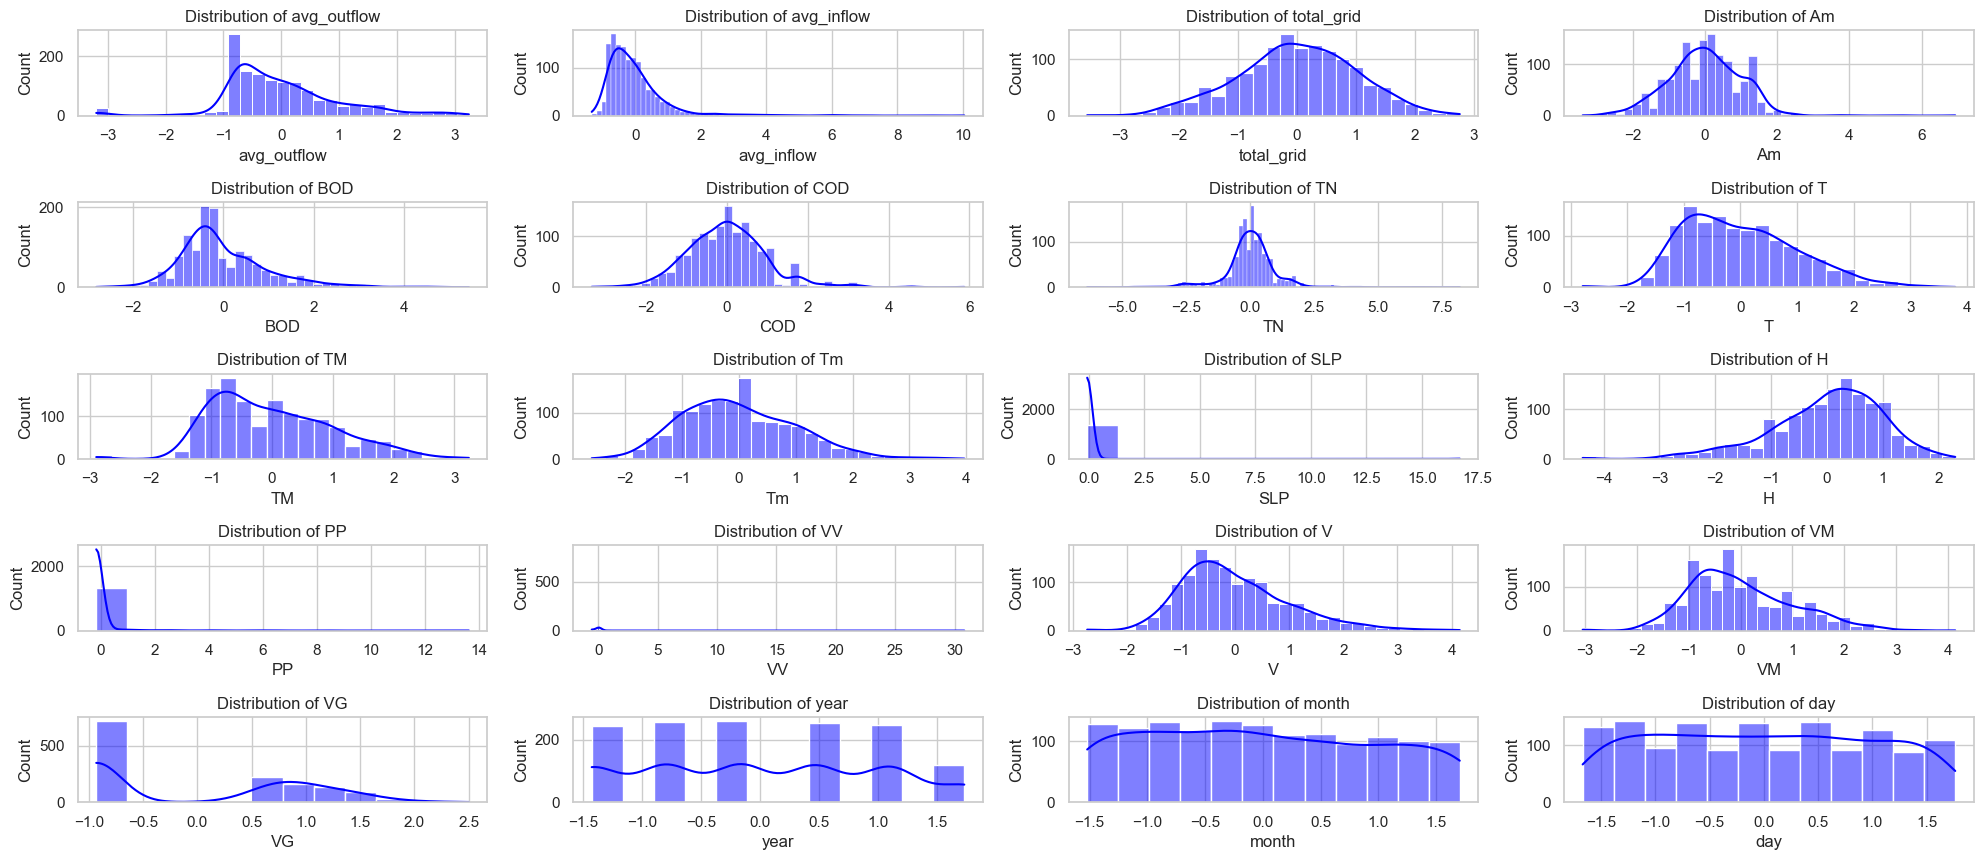

In [105]:
# Distribution of numerical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 4) + 1, 4, i)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

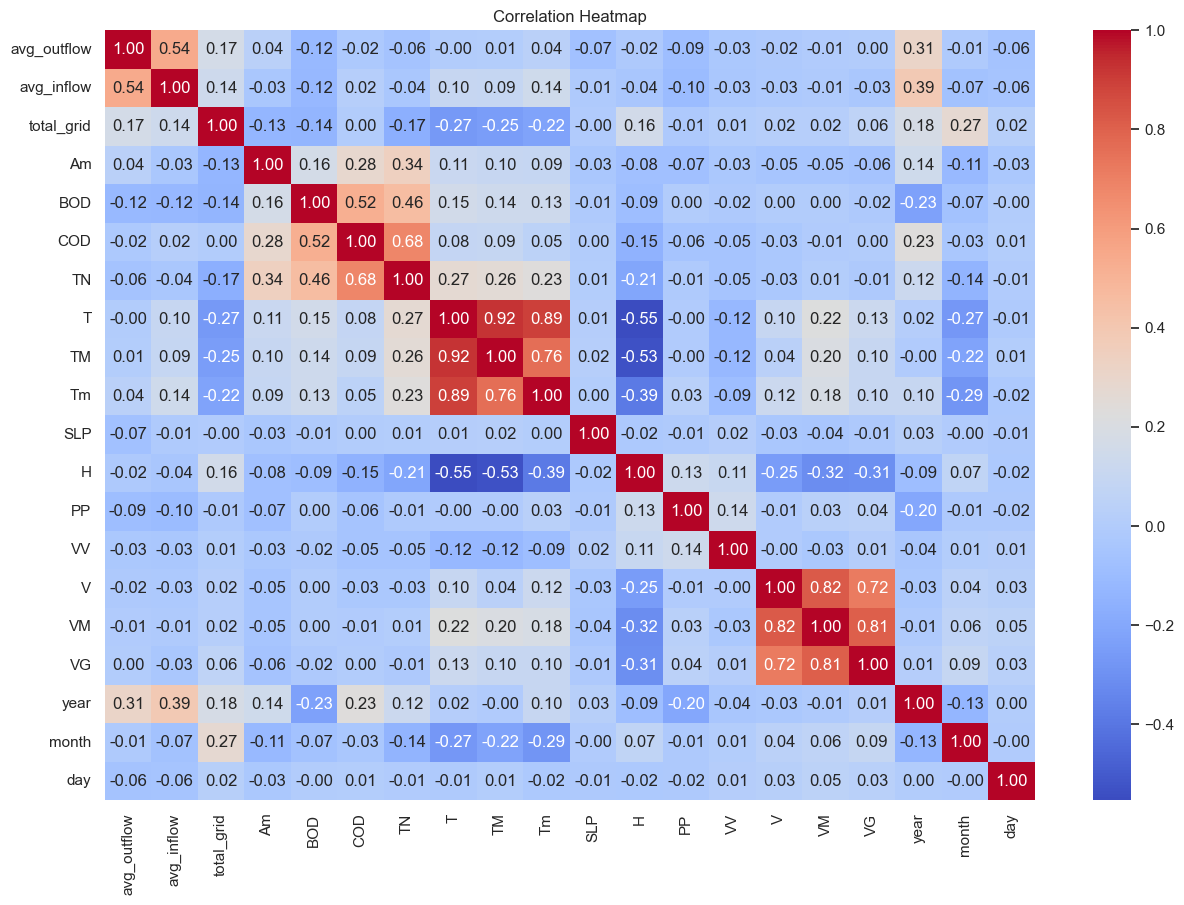

In [106]:
# Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

Modeling with Machine Learning Algorithms:
Apply various machine learning algorithms to classify the operational state of the wastewater treatment process. Use the following algorithms:
Logistic Regression from scratch as well as from sklearn
K-Nearest Neighbours (KNN)
Decision Tree Classifier
Random Forest Classifier
Support Vector Machine (SVM)
Any other relevant algorithms you feel might improve performance.


In [107]:
# Data Preparation
X = data[final_selected_features]
Y = data['COD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [108]:
# Classification Threshold
threshold = Y.mean()
Y_train_class = (Y_train > threshold).astype(int)
Y_test_class = (Y_test > threshold).astype(int)

In [109]:
# Logistic Regression (from scratch)
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            error = predictions - Y
            self.theta -= self.learning_rate * (1 / self.m) * np.dot(X.T, error)
    
    def predict(self, X):
        z = np.dot(X, self.theta)
        return np.round(self.sigmoid(z))
log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, Y_train_class)
Y_pred_scratch = log_reg_scratch.predict(X_test)

In [110]:
# Model Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

In [111]:
# Train and Evaluate Models
models = {
    "Logistic Regression (sklearn)": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

In [112]:
# Logistic regression (from sklearn) 

log_reg_sklearn = LogisticRegression()
log_reg_sklearn.fit(X_train, Y_train_class)
Y_pred_sklearn = log_reg_sklearn.predict(X_test)

In [113]:
# K Nearest Neighbour (KNN) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train_class)
Y_pred_knn = knn.predict(X_test)

In [114]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train_class)
Y_pred_dt = dt.predict(X_test)

In [115]:
# Random Forest Classifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, Y_train_class)
Y_pred_rf = rf.predict(X_test)

In [116]:
# Support Vector Machine

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, Y_train_class)
Y_pred_svm = svm.predict(X_test)

Model Evaluation:
Evaluate and compare models using accuracy, F1-score, and confusion matrix, and perform hyperparameter tuning to optimize performance on the test dataset.


In [117]:
# Model Evaluation

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f"{model_name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{cm}\n")

evaluate_model(Y_test_class, Y_pred_scratch, "Logistic Regression (Scratch)")
evaluate_model(Y_test_class, Y_pred_sklearn, "Logistic Regression (sklearn)")
evaluate_model(Y_test_class, Y_pred_knn, "KNN")
evaluate_model(Y_test_class, Y_pred_dt, "Decision Tree")
evaluate_model(Y_test_class, Y_pred_rf, "Random Forest")
evaluate_model(Y_test_class, Y_pred_svm, "SVM")

Logistic Regression (Scratch) - Accuracy: 0.8520, F1-Score: 0.8629
Confusion Matrix:
[[107  30]
 [ 11 129]]

Logistic Regression (sklearn) - Accuracy: 0.9675, F1-Score: 0.9670
Confusion Matrix:
[[136   1]
 [  8 132]]

KNN - Accuracy: 0.8412, F1-Score: 0.8382
Confusion Matrix:
[[119  18]
 [ 26 114]]

Decision Tree - Accuracy: 1.0000, F1-Score: 1.0000
Confusion Matrix:
[[137   0]
 [  0 140]]

Random Forest - Accuracy: 1.0000, F1-Score: 1.0000
Confusion Matrix:
[[137   0]
 [  0 140]]

SVM - Accuracy: 0.9675, F1-Score: 0.9668
Confusion Matrix:
[[137   0]
 [  9 131]]



In [118]:

# This is Random Forest Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, Y_train_class)
print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)


Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [119]:
#We will now evaluate Tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)
evaluate_model(Y_test_class, y_pred_rf_tuned, "Random Forest (Tuned)")

Random Forest (Tuned) - Accuracy: 1.0000, F1-Score: 1.0000
Confusion Matrix:
[[137   0]
 [  0 140]]



In [120]:
from sklearn.model_selection import GridSearchCV

# -------------------------------------------
# 1. Hyperparameter Tuning: Decision Tree
# -------------------------------------------
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    n_jobs=-1
)
grid_search_dt.fit(X_train, Y_train_class)

print(f"Best Parameters (Decision Tree): {grid_search_dt.best_params_}")
best_dt = grid_search_dt.best_estimator_

# Evaluate tuned Decision Tree
Y_pred_dt_tuned = best_dt.predict(X_test)
evaluate_model(Y_test_class, Y_pred_dt_tuned, "Decision Tree (Tuned)")



# 2. Hyperparameter Tuning: K-Nearest Neighbors

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    n_jobs=-1
)
grid_search_knn.fit(X_train, Y_train_class)

print(f"Best Parameters (KNN): {grid_search_knn.best_params_}")
best_knn = grid_search_knn.best_estimator_

# Evaluate tuned KNN
Y_pred_knn_tuned = best_knn.predict(X_test)
evaluate_model(Y_test_class, Y_pred_knn_tuned, "KNN (Tuned)")


# 3. Hyperparameter Tuning: Support Vector Machine

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    n_jobs=-1
)
grid_search_svm.fit(X_train, Y_train_class)

print(f"Best Parameters (SVM): {grid_search_svm.best_params_}")
best_svm = grid_search_svm.best_estimator_

# Evaluate tuned SVM
Y_pred_svm_tuned = best_svm.predict(X_test)
evaluate_model(Y_test_class, Y_pred_svm_tuned, "SVM (Tuned)")


# 4. Hyperparameter Tuning: Random Forest
#    (Already shown, repeated here for completeness)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    n_jobs=-1
)
grid_search_rf.fit(X_train, Y_train_class)

print(f"Best Parameters (Random Forest): {grid_search_rf.best_params_}")
best_rf = grid_search_rf.best_estimator_

# Evaluate tuned Random Forest
Y_pred_rf_tuned = best_rf.predict(X_test)
evaluate_model(Y_test_class, Y_pred_rf_tuned, "Random Forest (Tuned)")

Best Parameters (Decision Tree): {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree (Tuned) - Accuracy: 1.0000, F1-Score: 1.0000
Confusion Matrix:
[[137   0]
 [  0 140]]

Best Parameters (KNN): {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
KNN (Tuned) - Accuracy: 0.8917, F1-Score: 0.8913
Confusion Matrix:
[[124  13]
 [ 17 123]]

Best Parameters (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
SVM (Tuned) - Accuracy: 0.9783, F1-Score: 0.9781
Confusion Matrix:
[[137   0]
 [  6 134]]

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest (Tuned) - Accuracy: 1.0000, F1-Score: 1.0000
Confusion Matrix:
[[137   0]
 [  0 140]]

